✅ Data loaded successfully with shape: (1395973, 6)


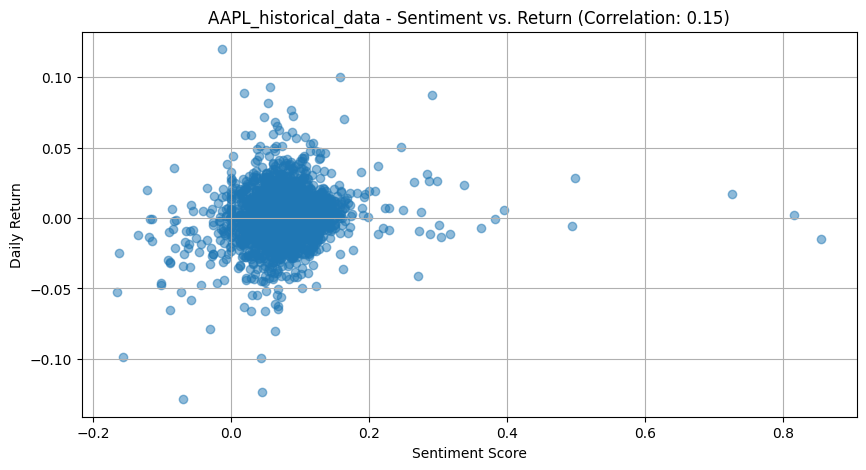

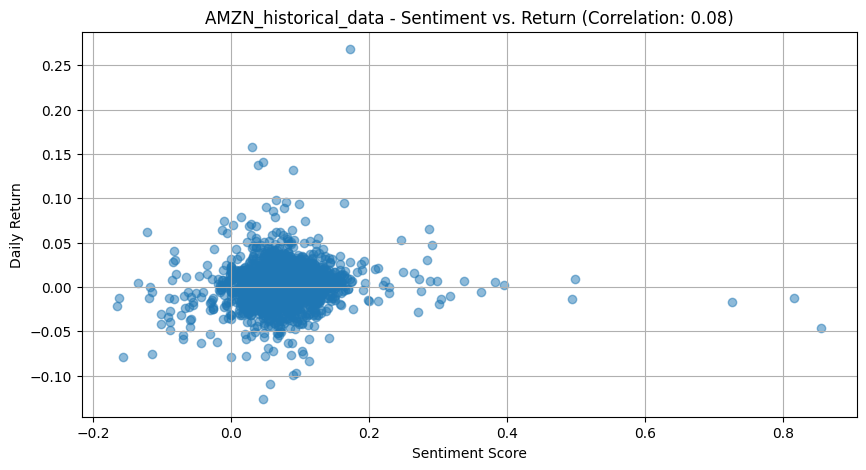

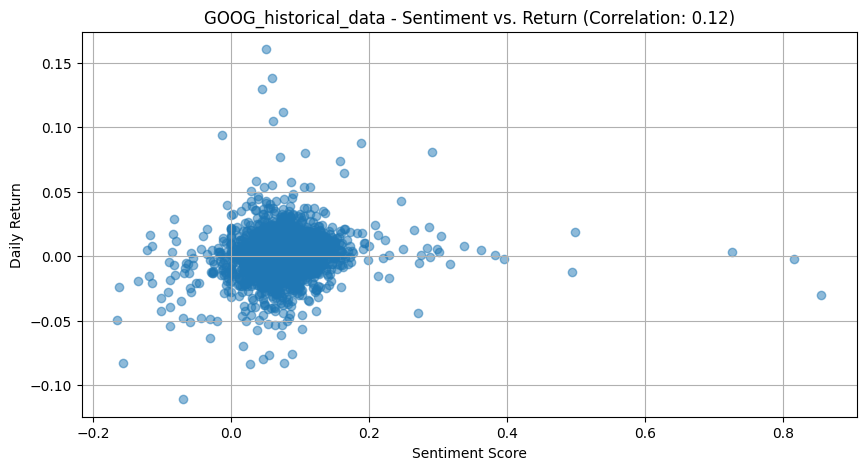

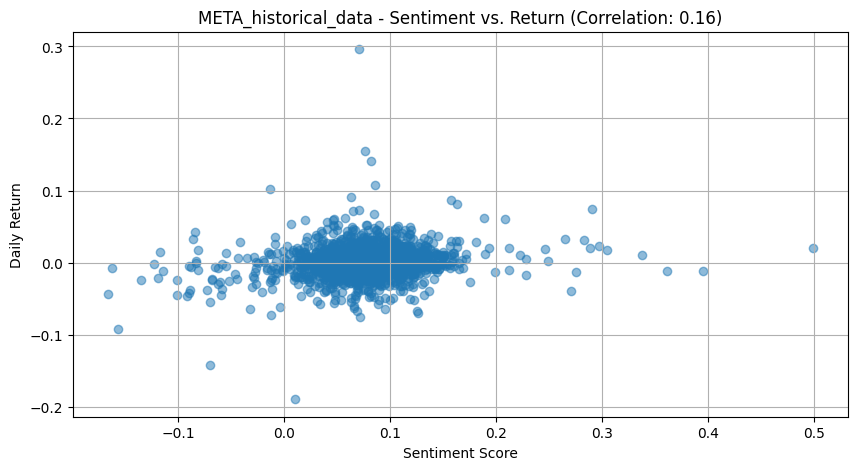

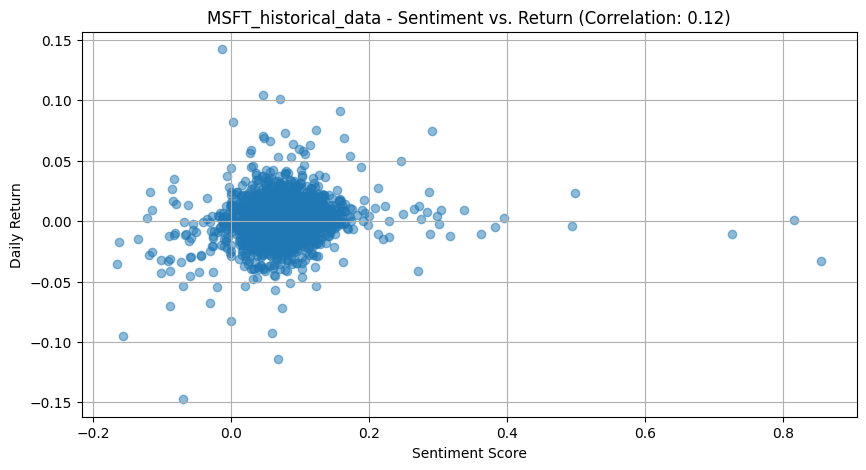

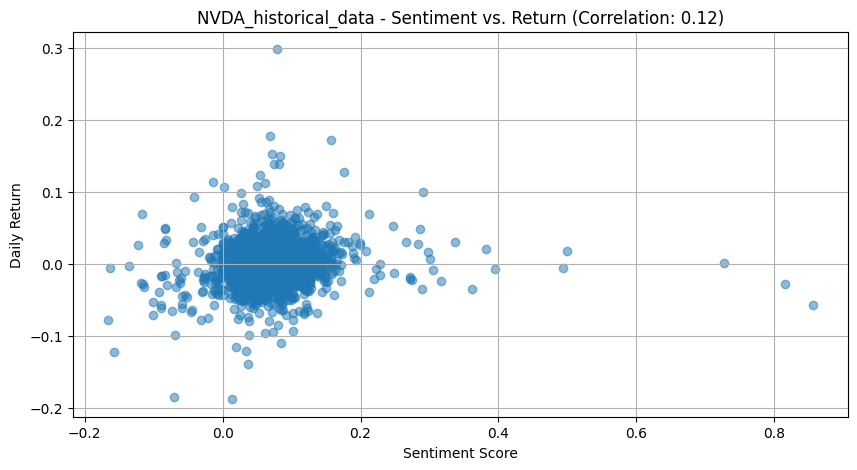

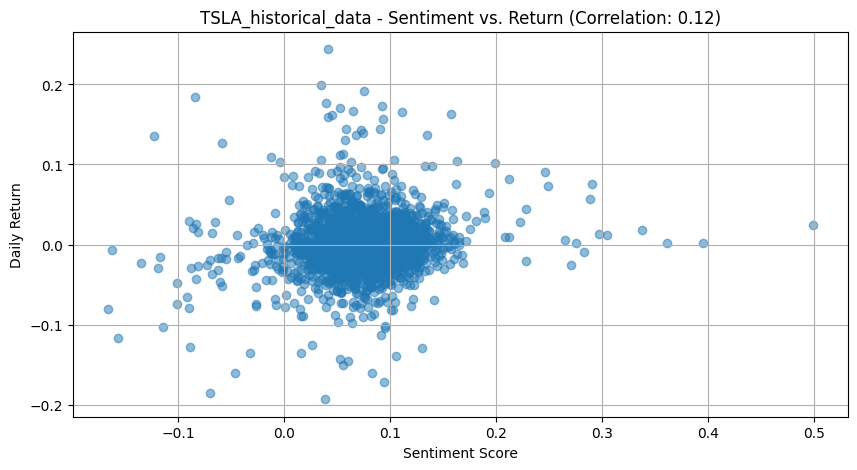

,Correlation with Sentiment
META_historical_data,0.164358
AAPL_historical_data,0.146602
GOOG_historical_data,0.124644
MSFT_historical_data,0.121832
TSLA_historical_data,0.119495
NVDA_historical_data,0.115759
AMZN_historical_data,0.080287


In [7]:
import pandas as pd
import os
import sys
import importlib
sys.path.append(os.path.abspath(".."))
import src.data_manager
importlib.reload(src.data_manager)
import src.correlation_analyzer
importlib.reload(src.correlation_analyzer)
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
tqdm.pandas()

from src.correlation_analyzer import CorrelationAnalyzer
from src.data_manager import DataManager

# Load cleaned news data

news_path = "../data/cleaned_news_data.csv"
loader = DataManager(news_path)
news_data = loader.load_data()



# Initialize analyzer
analyzer = CorrelationAnalyzer(news_data)
analyzer.compute_sentiment_scores()
analyzer.daily_sentiment.head()

# Analyze correlation for each stock
stock_folder = "../data/yfinance_data"
correlations = {}

for file in os.listdir(stock_folder):
    if file.endswith(".csv"):
        stock_name = file.split(".")[0]
        stock_path = os.path.join(stock_folder, file)
        stock_df = pd.read_csv(stock_path)

        try:
            merged, corr = analyzer.merge_and_correlate(stock_df)
            correlations[stock_name] = corr

            # Plotting
            plt.figure(figsize=(10,5))
            plt.scatter(merged['sentiment'], merged['return'], alpha=0.5)
            plt.title(f"{stock_name} - Sentiment vs. Return (Correlation: {corr:.2f})")
            plt.xlabel("Sentiment Score")
            plt.ylabel("Daily Return")
            plt.grid(True)
            plt.show()
        except Exception as e:
            print(f" Skipping {stock_name} due to error: {e}")
#  Summary Table
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Sentiment'])
correlation_df.sort_values(by='Correlation with Sentiment', ascending=False)